In [441]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from pandas.plotting import autocorrelation_plot
from pandas import DataFrame
from matplotlib import pyplot
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error as mse

pd.set_option('display.max_columns', None)

In [442]:
# Read in the data file
data = pd.read_csv(
    'AmesHousing.txt',
    sep='\t',
    keep_default_na=False,
    na_values=[''])

In [443]:
# We can have a first look at the available columns in this dataset.
data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NA,NA,NA,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NA,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NA,MnPrv,NA,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NA,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NA,NA,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NA,NA,NA,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NA,MnPrv,NA,0,3,2010,WD,Normal,189900


In [444]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            2930 non-null   object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

# Checking missing data 

Text(0.5, 1.0, 'Percent missing data by feature')

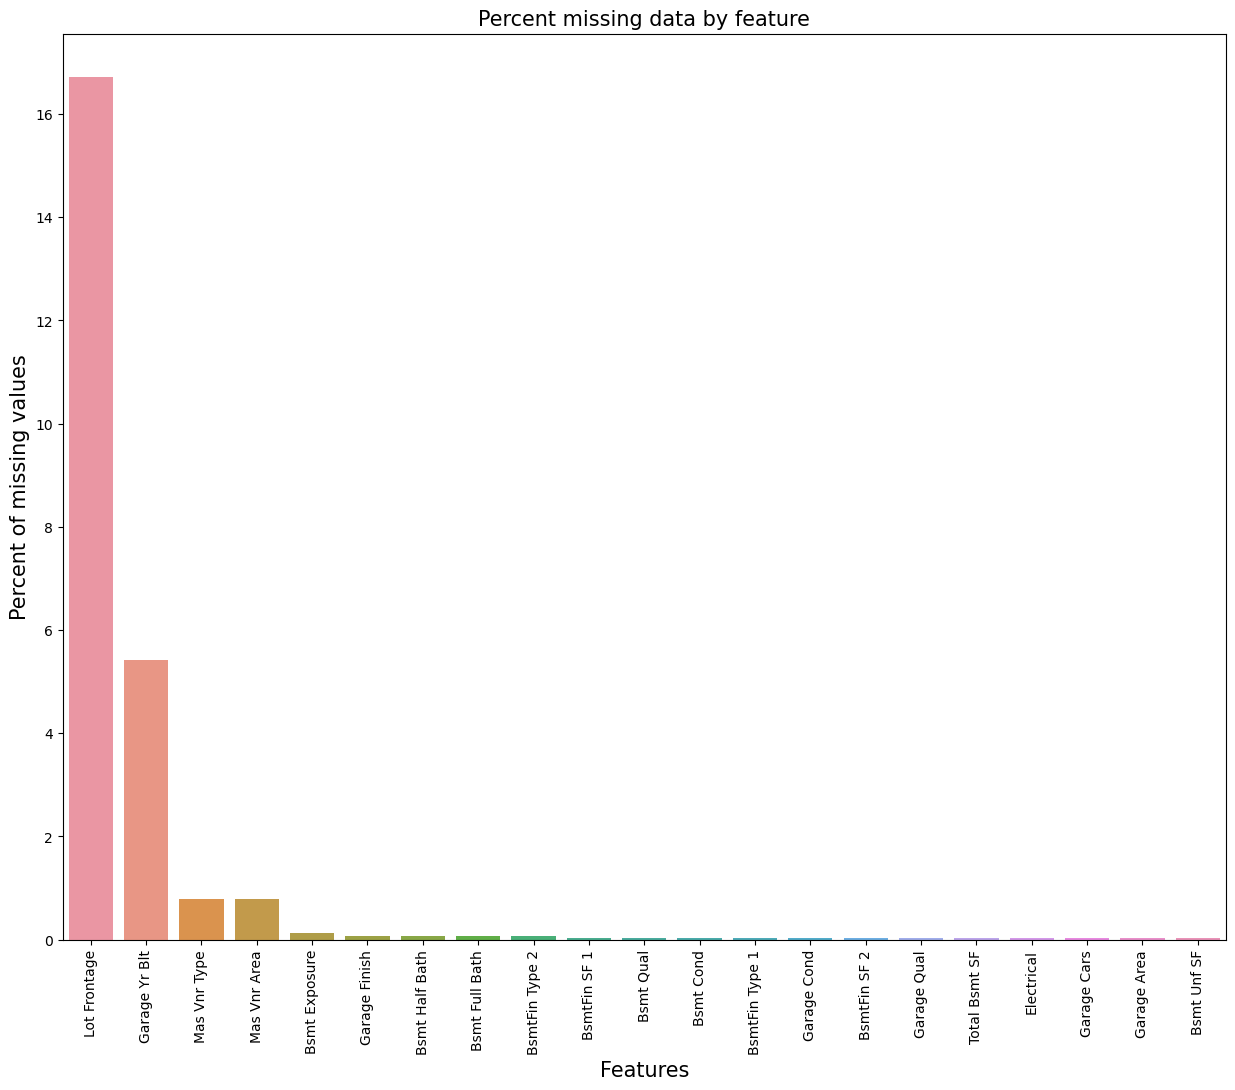

In [445]:
#Check missing data for the model

missing_values = (data.isnull().sum() / len(data)) * 100 #Count the number of missing value of each column
missing_values = missing_values.drop(missing_values[missing_values == 0].index).sort_values(ascending=False)[:30] #We drop all the row that contains the zero of missing values
missing_values_ratio = pd.DataFrame({'Missing Ratio' :missing_values})
missing_values_ratio.head(20)

#Plot a chart of missing values
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=missing_values.index, y=missing_values)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

# Check Sales Price Distribution

Skewness: 1.743500
Kurtosis: 5.118900


C:\Users\Tran Dong Hy\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Sales Price')

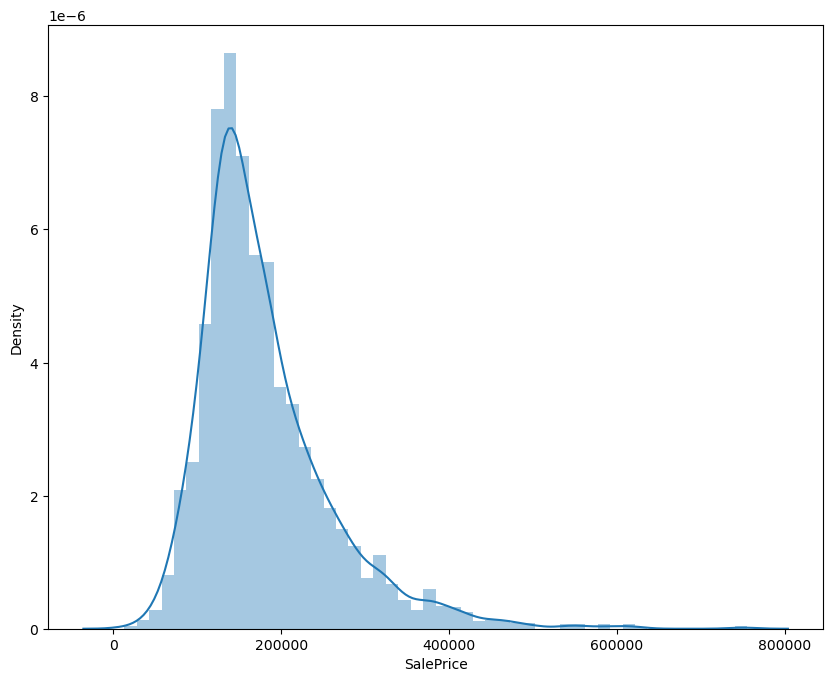

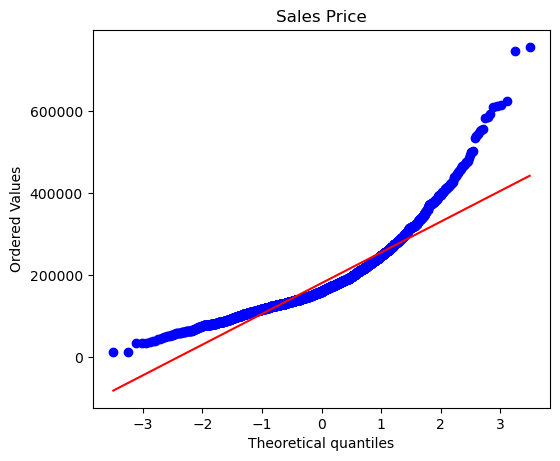

In [446]:
sns.distplot(data['SalePrice']);
print("Skewness: %f" % data['SalePrice'].skew())
print("Kurtosis: %f" % data['SalePrice'].kurt())

from scipy import stats
figure = plt.figure(figsize = (13,5))
plt.subplot(1,2,1)
stats.probplot(data['SalePrice'], plot = plt)
plt.title('Sales Price')

In [447]:
data['LogSalesPrice'] = np.log(data['SalePrice'])

Skewness: -0.014793
Kurtosis: 1.513907


C:\Users\Tran Dong Hy\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'LogSalesPrice')

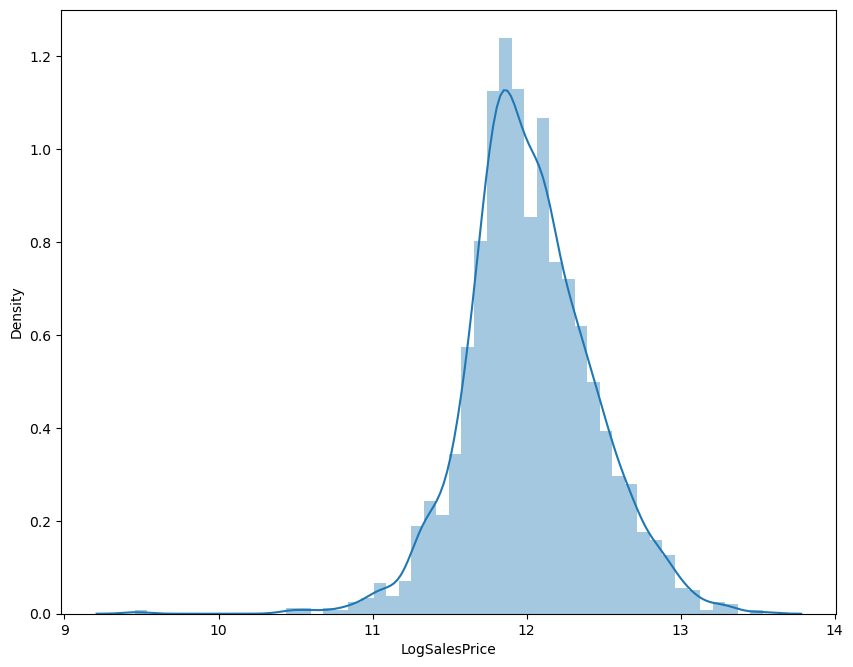

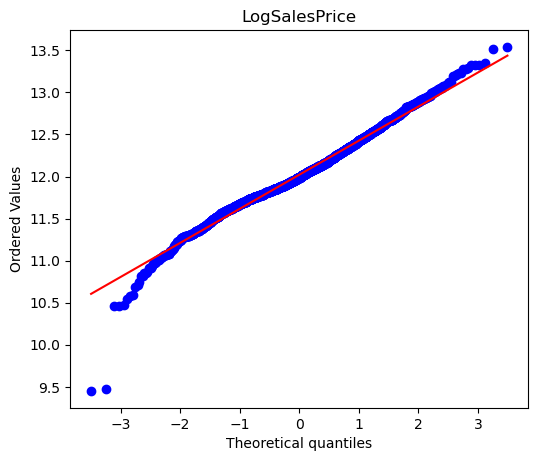

In [448]:
sns.distplot(data['LogSalesPrice']);
print("Skewness: %f" % data['LogSalesPrice'].skew())
print("Kurtosis: %f" % data['LogSalesPrice'].kurt())

from scipy import stats
figure = plt.figure(figsize = (13,5))
plt.subplot(1,2,1)
stats.probplot(data['LogSalesPrice'], plot = plt)
plt.title('LogSalesPrice')

# Checking Numerical Features Correlation with Sales Price

In [449]:
data2 = data.drop('Order', axis=1) #Drop the column "Order" from the data set
corr_matrix = round(data2.corr(method='pearson'),2) #Calculate the correlation matrix due to pearson and round the number to 3 decimals
corr_matrix["SalePrice"].sort_values(ascending=False).head(11) #Print the data of correlation of each numberical variables to sales price

SalePrice        1.00
LogSalesPrice    0.95
Overall Qual     0.80
Gr Liv Area      0.71
Garage Cars      0.65
Garage Area      0.64
Total Bsmt SF    0.63
1st Flr SF       0.62
Year Built       0.56
Full Bath        0.55
Garage Yr Blt    0.53
Name: SalePrice, dtype: float64

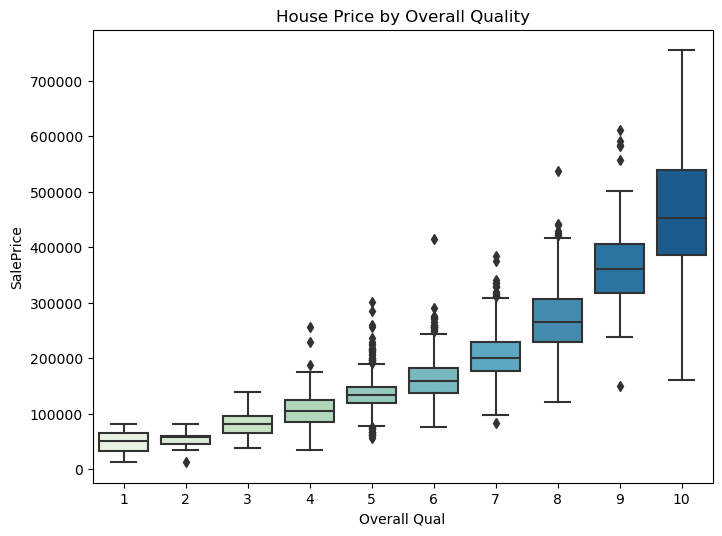

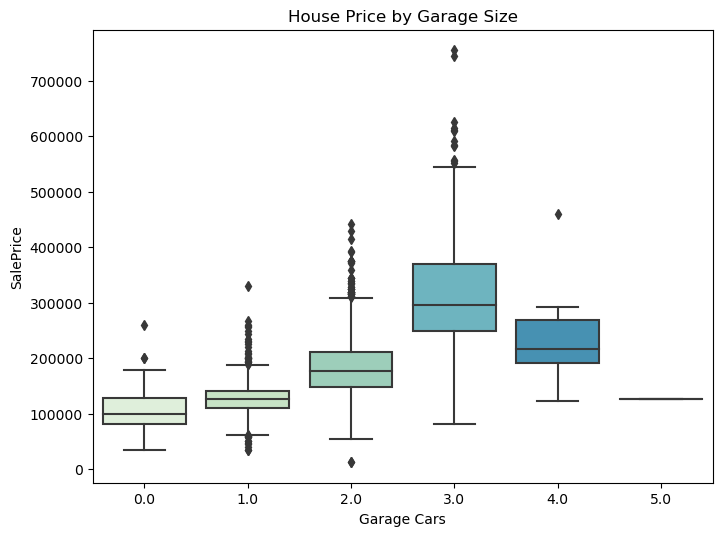

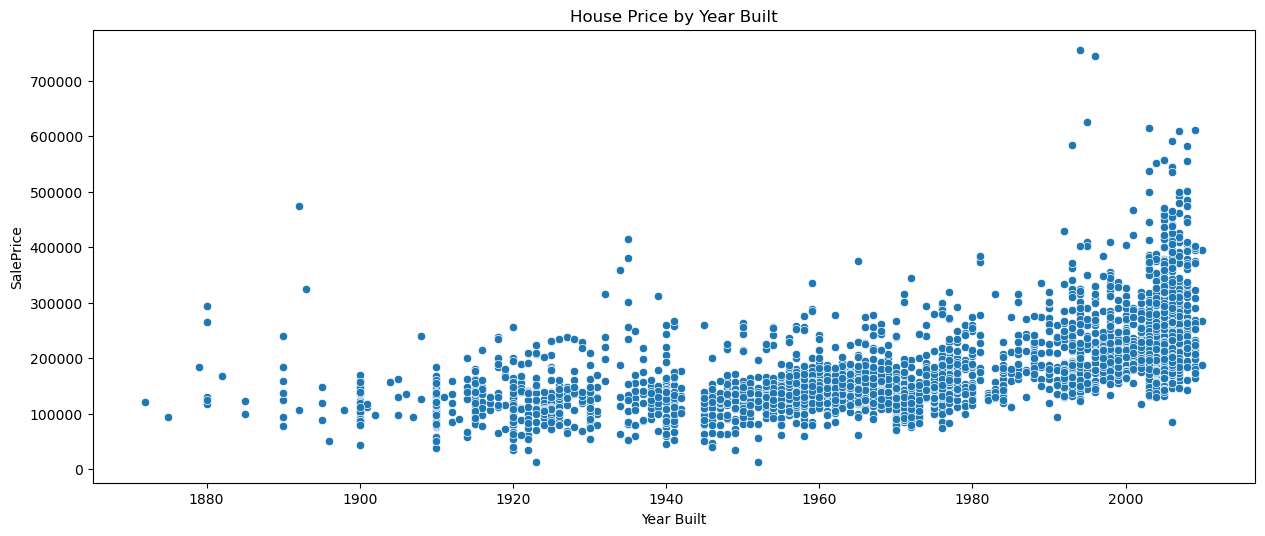

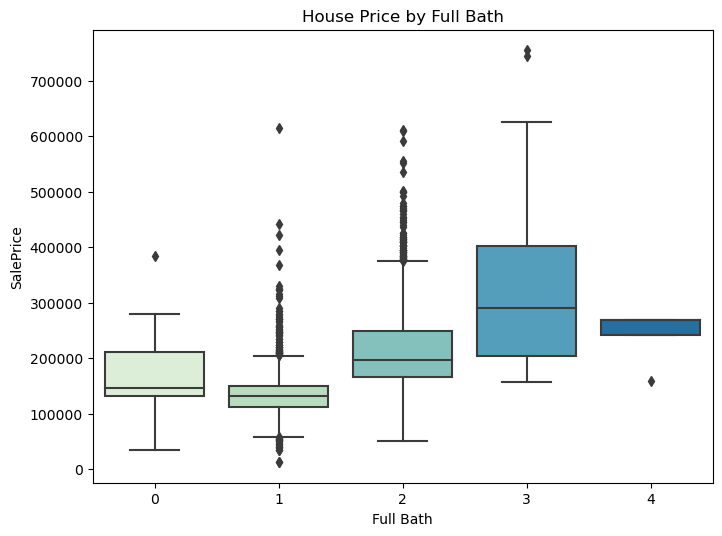

In [450]:
#According to above analyses, Overall Quality, Living Area, Number of Full Baths, Size of Garage and Year Built are some of the most important features in determining house price.

#Overall Quality
plt.figure(figsize=(8, 6))
sns.boxplot(x='Overall Qual', y='SalePrice', data=data, palette='GnBu')
title = plt.title('House Price by Overall Quality')

#Number of garage cares
plt.figure(figsize=(8, 6))
sns.boxplot(x='Garage Cars', y='SalePrice', data=data, palette='GnBu')
title = plt.title('House Price by Garage Size')

#Year Built
plt.figure(figsize=(15, 6))
sns.scatterplot(x='Year Built', y='SalePrice', data=data)
title = plt.title('House Price by Year Built')

#Number of Full bath
plt.figure(figsize=(8, 6))
sns.boxplot(x='Full Bath', y='SalePrice', data=data, palette='GnBu')
title = plt.title('House Price by Full Bath')

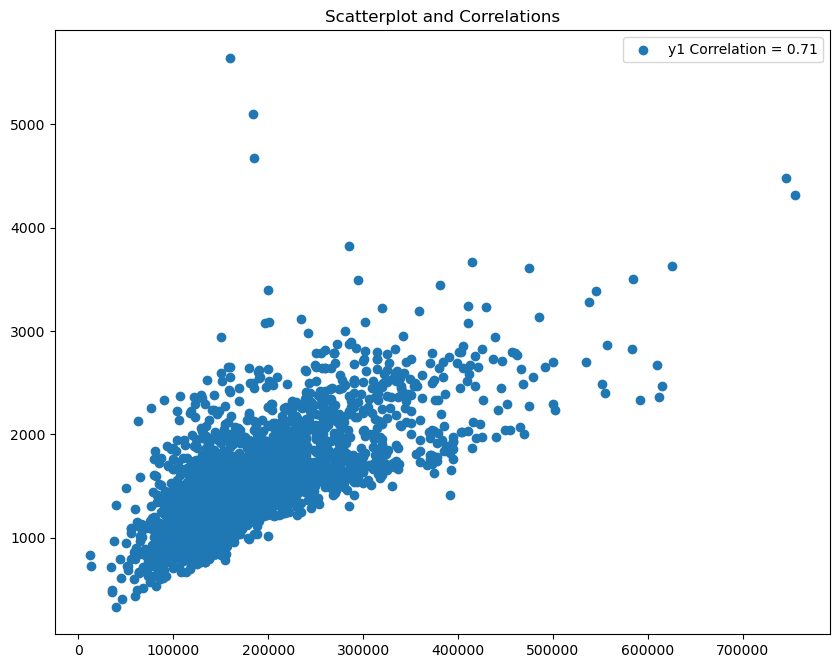

C:\Users\Tran Dong Hy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


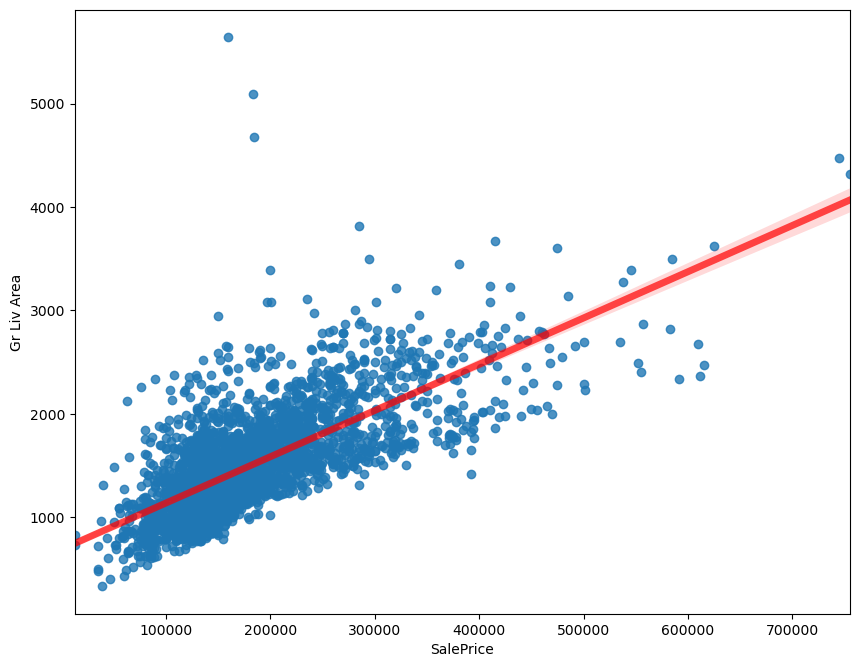

In [451]:
x = data2['SalePrice']
y = data2['Gr Liv Area']
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.scatter(x, y, label=f'y1 Correlation = {np.round(np.corrcoef(x,y)[0,1], 2)}')
# Plot
plt.title('Scatterplot and Correlations')
plt.legend()
plt.show()
import seaborn as sns
sns.regplot(x,y,line_kws={"color":"r","alpha":0.7,"lw":5})
plt.show()

# Checking Categorical Variables Correlation with Sales Price

In [452]:
data.select_dtypes(include=['object'])

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating,Heating QC,Central Air,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition
0,RL,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,BrkFace,Plywood,Stone,TA,TA,CBlock,TA,Gd,Gd,BLQ,Unf,GasA,Fa,Y,SBrkr,TA,Typ,Gd,Attchd,Fin,TA,TA,P,NA,NA,NA,WD,Normal
1,RH,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,Rec,LwQ,GasA,TA,Y,SBrkr,TA,Typ,NA,Attchd,Unf,TA,TA,Y,NA,MnPrv,NA,WD,Normal
2,RL,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,TA,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,TA,Y,SBrkr,Gd,Typ,NA,Attchd,Unf,TA,TA,Y,NA,NA,Gar2,WD,Normal
3,RL,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,BrkFace,BrkFace,None,Gd,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,Ex,Typ,TA,Attchd,Fin,TA,TA,Y,NA,NA,NA,WD,Normal
4,RL,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Gd,Y,SBrkr,TA,Typ,TA,Attchd,Fin,TA,TA,Y,NA,MnPrv,NA,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,RL,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,1Fam,SLvl,Gable,CompShg,HdBoard,HdBoard,None,TA,TA,CBlock,TA,TA,Av,GLQ,Unf,GasA,TA,Y,SBrkr,TA,Typ,NA,Detchd,Unf,TA,TA,Y,NA,GdPrv,NA,WD,Normal
2926,RL,Pave,NA,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,Gable,CompShg,HdBoard,HdBoard,None,TA,TA,CBlock,Gd,TA,Av,BLQ,ALQ,GasA,TA,Y,SBrkr,TA,Typ,NA,Attchd,Unf,TA,TA,Y,NA,MnPrv,NA,WD,Normal
2927,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,Gable,CompShg,HdBoard,Wd Shng,None,TA,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,TA,Y,SBrkr,TA,Typ,NA,NA,NA,NA,NA,Y,NA,MnPrv,Shed,WD,Normal
2928,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,Gable,CompShg,HdBoard,HdBoard,None,TA,TA,CBlock,Gd,TA,Av,ALQ,LwQ,GasA,Gd,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NA,NA,NA,WD,Normal


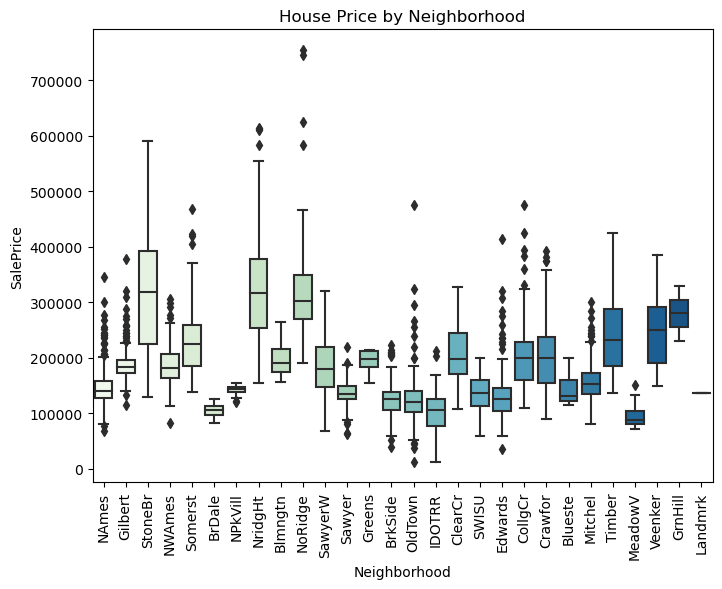

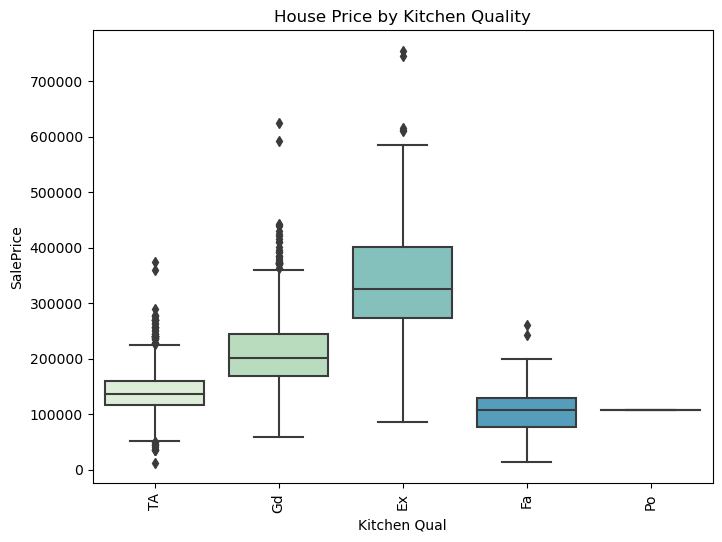

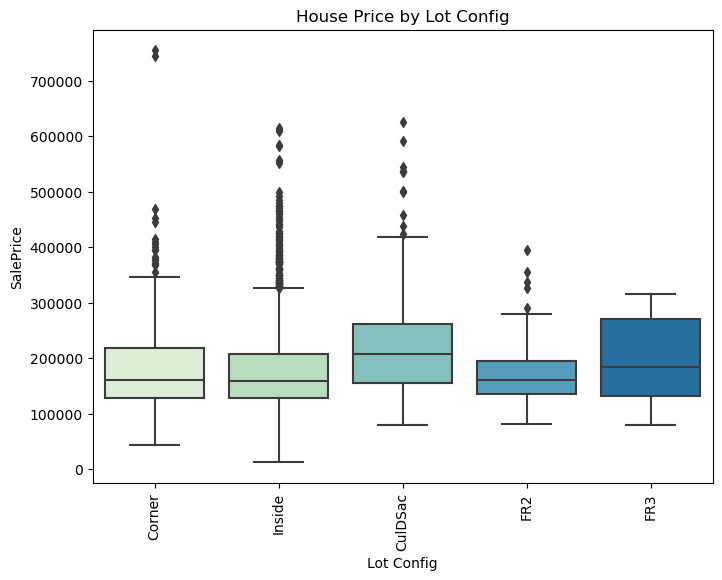

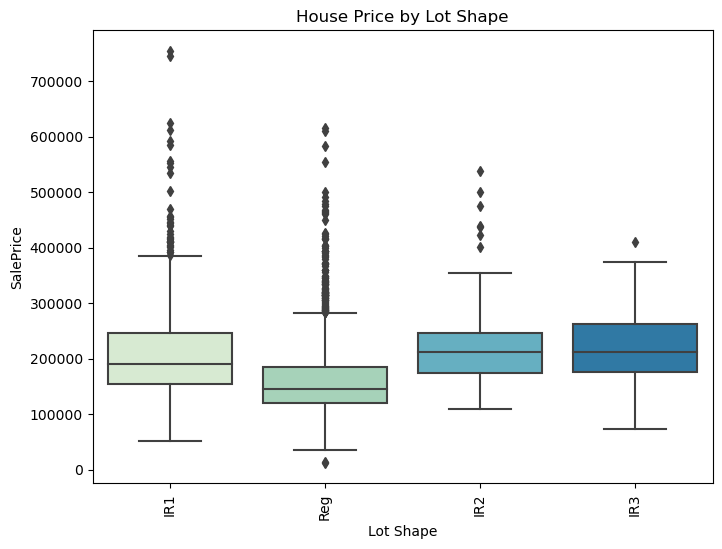

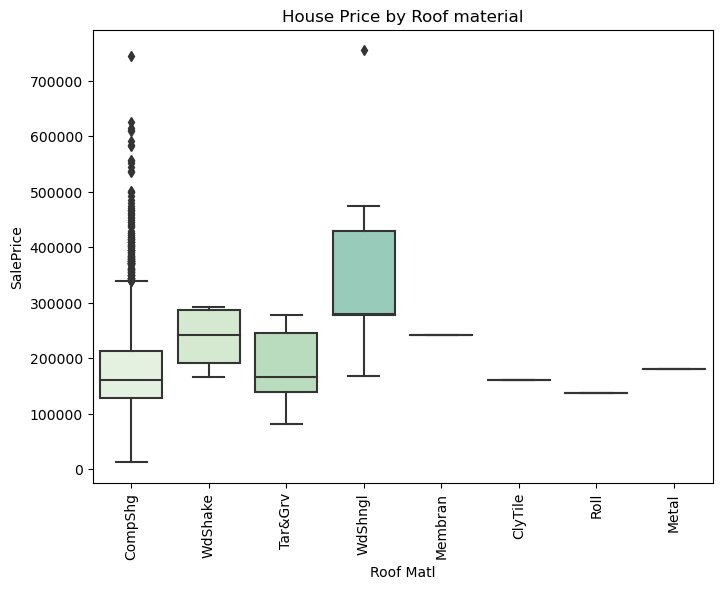

In [453]:
#Neighborhood
plt.figure(figsize=(8, 6))
plt.xticks(rotation='90')
sns.boxplot(x='Neighborhood', y='SalePrice', data=data, palette='GnBu')
title = plt.title('House Price by Neighborhood')

#Kitchen Quality
plt.figure(figsize=(8, 6))
plt.xticks(rotation='90')
sns.boxplot(x='Kitchen Qual', y='SalePrice', data=data, palette='GnBu')
title = plt.title('House Price by Kitchen Quality')

#Lot Config
plt.figure(figsize=(8, 6))
plt.xticks(rotation='90')
sns.boxplot(x='Lot Config', y='SalePrice', data=data, palette='GnBu')
title = plt.title('House Price by Lot Config')

#Lot Shape
plt.figure(figsize=(8, 6))
plt.xticks(rotation='90')
sns.boxplot(x='Lot Shape', y='SalePrice', data=data, palette='GnBu')
title = plt.title('House Price by Lot Shape')

#Roof materials
plt.figure(figsize=(8, 6))
plt.xticks(rotation='90')
sns.boxplot(x='Roof Matl', y='SalePrice', data=data, palette='GnBu')
title = plt.title('House Price by Roof material')


# Model 1: Internal Factors that affact the sales Price: Overall Quality, Full Bath, Garage Cars

In [454]:
from sklearn.linear_model import LinearRegression

In [455]:
prediction = data[['Overall Qual','Full Bath','Garage Cars','LogSalesPrice']]
prediction.replace([np.inf, -np.inf], np.nan)
prediction.dropna(inplace=True)
prediction

<ipython-input-455-d101aa74432b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prediction.dropna(inplace=True)


,Overall Qual,Full Bath,Garage Cars,LogSalesPrice
0,6,1,2.0,12.278393
1,5,1,1.0,11.561716
2,6,1,1.0,12.055250
3,7,2,2.0,12.404924
4,5,2,2.0,12.154253
...,...,...,...,...
2925,6,1,2.0,11.867097
2926,5,1,2.0,11.782953
2927,5,1,0.0,11.790557
2928,5,1,2.0,12.043554


In [456]:
x = prediction[['Overall Qual','Full Bath','Garage Cars']]
y = prediction['LogSalesPrice']

In [457]:
from sklearn.model_selection import train_test_split
#train_test split under test_size=0.3
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)
#print shape of x and y
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(2050, 3)
(2050,)
(879, 3)


In [458]:
linear_reg = LinearRegression()
linear_reg.fit(x_train,y_train)

LinearRegression()

In [459]:
x_coe=x.to_numpy().reshape(-1,3)
y_coe=y.to_numpy()

#2.create model
linear_reg=LinearRegression()

#3.fit the model
linear_reg.fit(x_coe,y_coe)

beta0=linear_reg.intercept_
print('beta0:{:.2f}'.format(beta0))

for i in range(3):
     beta=linear_reg.coef_[i]
     print('beta{}:{:.2f}'.format(i+1,beta))

beta0:10.56
beta1:0.17
beta2:0.11
beta3:0.13


0.7515218701114321 0.7511575326775779
0.041122344509120674


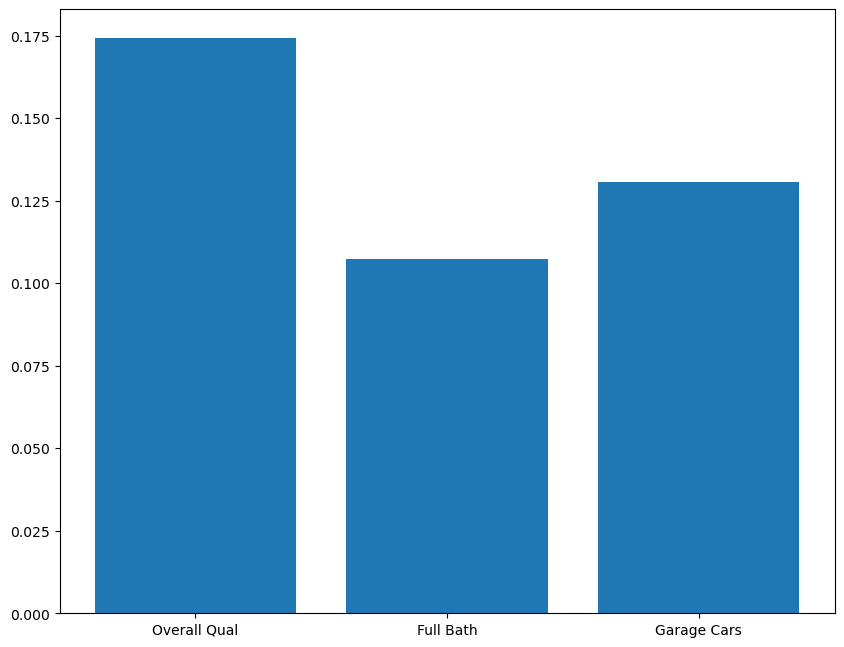

In [460]:
x_train.columns
plt.figure(figsize=(10,8))
plt.bar(x_train.columns,linear_reg.coef_)

#calculate R^2 and adjusted R^2 to evaluate the model
import statsmodels.api as sm

#add a column before the first column to ensure have residuals 
nrows=x_train.shape[0]
ones=np.ones((nrows,1))
x_addcons=np.hstack((ones,x_train))

result=sm.OLS(y_train,x_addcons).fit()
print(result.rsquared,result.rsquared_adj)

#calculate y prediction under x_train
from sklearn.metrics import mean_squared_error as mse
y_prediction=linear_reg.predict(x_train)

print(mse(y_prediction, y_train))

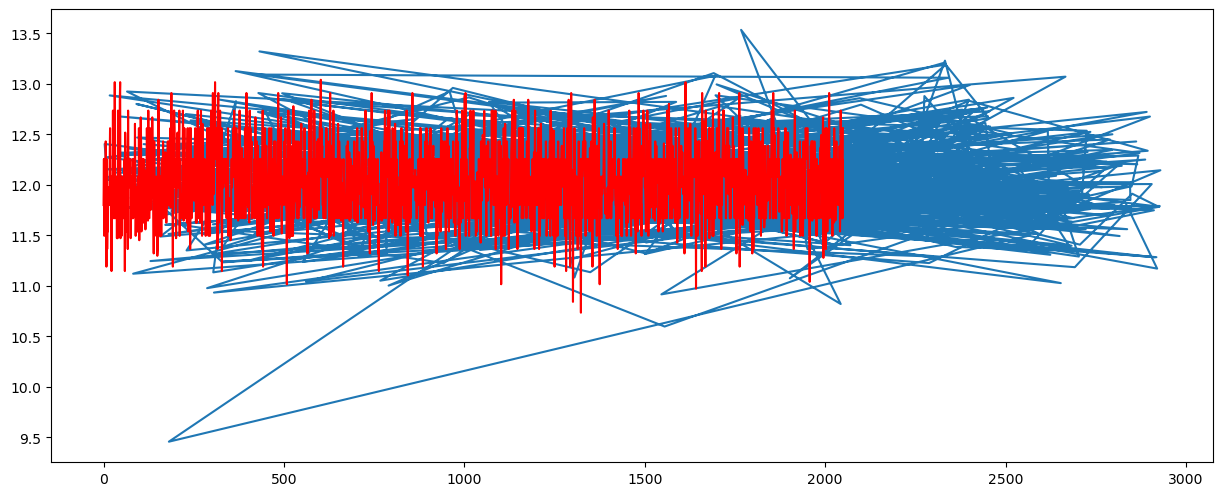

In [461]:
plt.figure(figsize=(15, 6))
pyplot.plot(y_test)
pyplot.plot(y_prediction, color='red')
pyplot.show()

# Model 2: External Factors that affact the sales Price: Year Build, Group Living Area

In [462]:
from sklearn.linear_model import LinearRegression

prediction1 = data[['Year Built','Gr Liv Area','LogSalesPrice']]
prediction1.replace([np.inf, -np.inf], np.nan)
prediction1.dropna(inplace=True)
prediction1

<ipython-input-462-5e4778d09457>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prediction1.dropna(inplace=True)


,Year Built,Gr Liv Area,LogSalesPrice
0,1960,1656,12.278393
1,1961,896,11.561716
2,1958,1329,12.055250
3,1968,2110,12.404924
4,1997,1629,12.154253
...,...,...,...
2925,1984,1003,11.867097
2926,1983,902,11.782953
2927,1992,970,11.790557
2928,1974,1389,12.043554


In [463]:
x = prediction1[['Year Built','Gr Liv Area']]
y = prediction1['LogSalesPrice']

In [464]:
from sklearn.model_selection import train_test_split
#train_test split under test_size=0.3
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)
#print shape of x and y
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
linear_reg = LinearRegression()
linear_reg.fit(x_train,y_train)
x_coe=x.to_numpy().reshape(-1,2)
y_coe=y.to_numpy()

#2.create model
linear_reg=LinearRegression()

#3.fit the model
linear_reg.fit(x_coe,y_coe)

beta0=linear_reg.intercept_
print('beta0:{:.4f}'.format(beta0))

for i in range(2):
     beta=linear_reg.coef_[i]
     print('beta{}:{:.4f}'.format(i+1,beta))

(2051, 2)
(2051,)
(879, 2)
beta0:-1.3014
beta1:0.0064
beta2:0.0005


0.6900918910494575 0.6897892464118105
0.051853610062087635


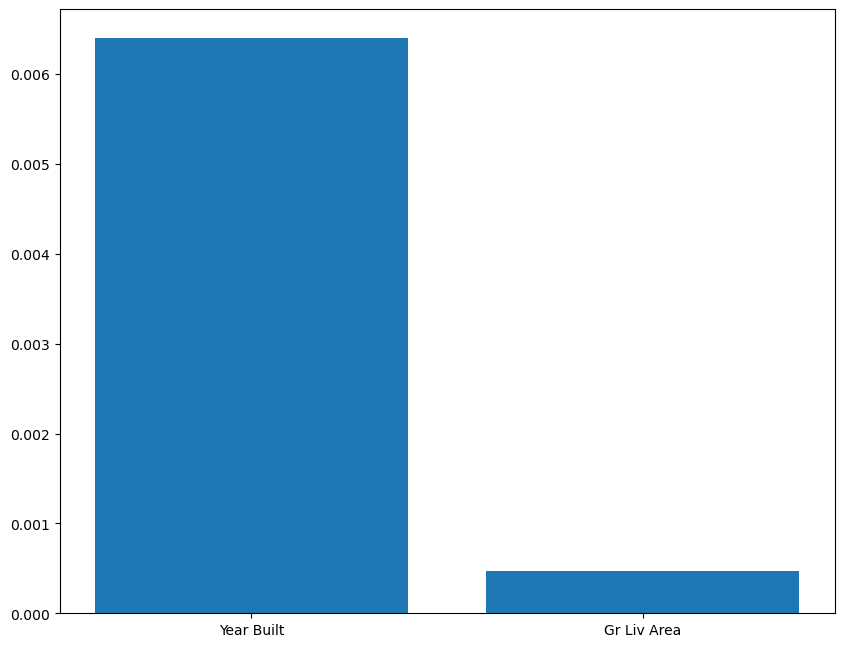

In [465]:
x_train.columns
plt.figure(figsize=(10,8))
plt.bar(x_train.columns,linear_reg.coef_)

#calculate R^2 and adjusted R^2 to evaluate the model
import statsmodels.api as sm

#add a column before the first column to ensure have residuals 
nrows=x_train.shape[0]
ones=np.ones((nrows,1))
x_addcons=np.hstack((ones,x_train))

result=sm.OLS(y_train,x_addcons).fit()
print(result.rsquared,result.rsquared_adj)

#calculate y prediction under x_train
from sklearn.metrics import mean_squared_error as mse
y_prediction=linear_reg.predict(x_train)

print(mse(y_prediction, y_train))

# Model 3: Combine both external and internal factors to predict Log Sales 

In [466]:
from sklearn.linear_model import LinearRegression

prediction2 = data[['Overall Qual','Full Bath','Garage Cars','Year Built','Gr Liv Area','LogSalesPrice']]
prediction2.replace([np.inf, -np.inf], np.nan)
prediction2.dropna(inplace=True)
prediction2

<ipython-input-466-b6ad20f97c1b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prediction2.dropna(inplace=True)


,Overall Qual,Full Bath,Garage Cars,Year Built,Gr Liv Area,LogSalesPrice
0,6,1,2.0,1960,1656,12.278393
1,5,1,1.0,1961,896,11.561716
2,6,1,1.0,1958,1329,12.055250
3,7,2,2.0,1968,2110,12.404924
4,5,2,2.0,1997,1629,12.154253
...,...,...,...,...,...,...
2925,6,1,2.0,1984,1003,11.867097
2926,5,1,2.0,1983,902,11.782953
2927,5,1,0.0,1992,970,11.790557
2928,5,1,2.0,1974,1389,12.043554


In [467]:
x = prediction2[['Overall Qual','Full Bath','Garage Cars','Year Built','Gr Liv Area']]
y = prediction2['LogSalesPrice']

In [468]:
from sklearn.model_selection import train_test_split
#train_test split under test_size=0.3
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)
#print shape of x and y
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)



(2050, 5)
(2050,)
(879, 5)


In [469]:

from sklearn.model_selection import train_test_split
#train_test split under test_size=0.3
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)
#print shape of x and y
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
linear_reg = LinearRegression()
linear_reg.fit(x_train,y_train)
x_coe=x.to_numpy().reshape(-1,5)
y_coe=y.to_numpy()

#2.create model
linear_reg=LinearRegression()

#3.fit the model
linear_reg.fit(x_coe,y_coe)

beta0=linear_reg.intercept_
print('beta0:{:.4f}'.format(beta0))

for i in range(5):
     beta=linear_reg.coef_[i]
     print('beta{}:{:.4f}'.format(i+1,beta))

(2050, 5)
(2050,)
(879, 5)
beta0:5.1146
beta1:0.1238
beta2:-0.0294
beta3:0.0815
beta4:0.0029
beta5:0.0003


0.8057877958926274 0.8053127171154567
0.0322017971037722


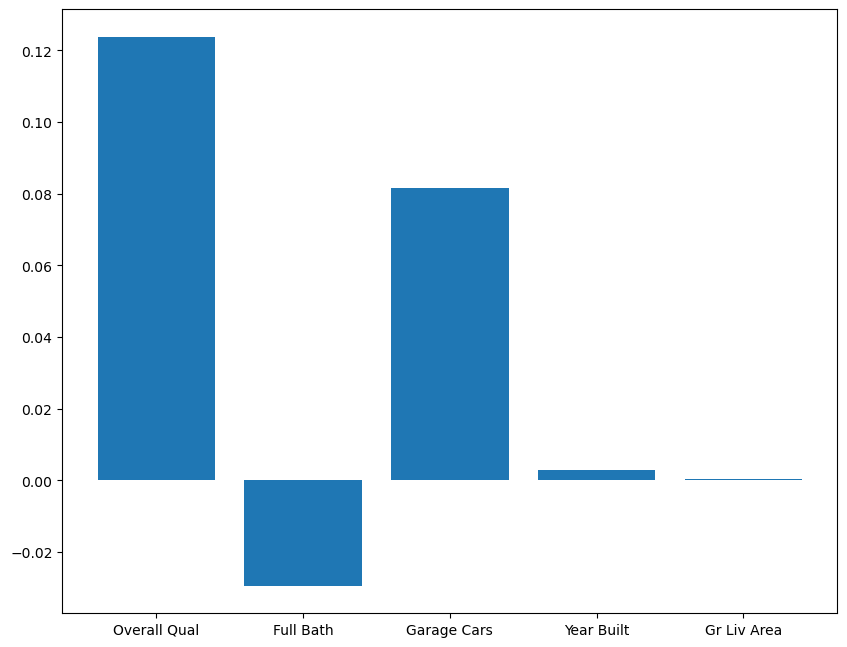

In [470]:
x_train.columns
plt.figure(figsize=(10,8))
plt.bar(x_train.columns,linear_reg.coef_)

#calculate R^2 and adjusted R^2 to evaluate the model
import statsmodels.api as sm

#add a column before the first column to ensure have residuals 
nrows=x_train.shape[0]
ones=np.ones((nrows,1))
x_addcons=np.hstack((ones,x_train))

result=sm.OLS(y_train,x_addcons).fit()
print(result.rsquared,result.rsquared_adj)

#calculate y prediction under x_test
from sklearn.metrics import mean_squared_error as mse
y_prediction=linear_reg.predict(x_train)

print(mse(y_prediction, y_train))

[10.80565351 10.82733764 10.84902178 10.87070592 10.89239006 10.91407419
 10.93575833 10.95744247 10.9791266  11.00081074 11.02249488 11.04417902
 11.06586315 11.08754729 11.10923143 11.13091557 11.1525997  11.17428384
 11.19596798 11.21765211 11.23933625 11.26102039 11.28270453 11.30438866
 11.3260728  11.34775694 11.36944108 11.39112521 11.41280935 11.43449349
 11.45617762 11.47786176 11.4995459  11.52123004 11.54291417 11.56459831
 11.58628245 11.60796658 11.62965072 11.65133486 11.673019   11.69470313
 11.71638727 11.73807141 11.75975555 11.78143968 11.80312382 11.82480796
 11.84649209 11.86817623 11.88986037 11.91154451 11.93322864 11.95491278
 11.97659692 11.99828106 12.01996519 12.04164933 12.06333347 12.0850176
 12.10670174 12.12838588 12.15007002 12.17175415 12.19343829 12.21512243
 12.23680657 12.2584907  12.28017484 12.30185898 12.32354311 12.34522725
 12.36691139 12.38859553 12.41027966 12.4319638  12.45364794 12.47533208
 12.49701621 12.51870035 12.54038449 12.56206862 12.

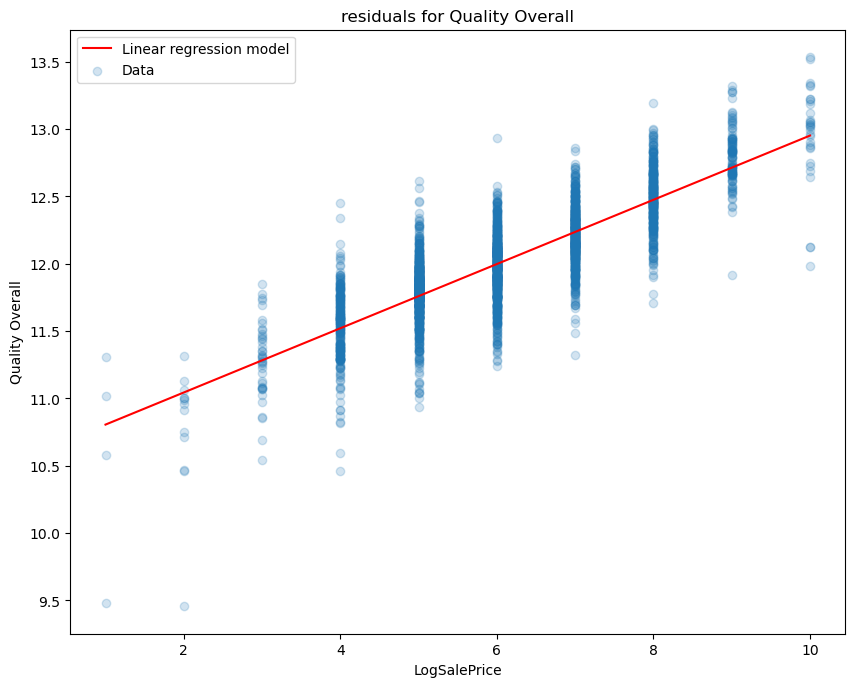

In [471]:
x_train_linear=prediction2['Overall Qual'].to_numpy().reshape(-1,1)
y_train_linear=prediction2['LogSalesPrice'].to_numpy()

#2.create model
linear_reg=LinearRegression()

#3.fit the model
linear_reg.fit(x_train_linear,y_train_linear)
min_quantity=x_train_linear.min()
max_quantity=x_train_linear.max()

#4.predict
x_train_linear_new=np.linspace(min_quantity, max_quantity,100).reshape(-1,1)#numpy array,storing 100, reshape(-1,1)
pred=linear_reg.predict(x_train_linear_new)
print(pred)


print('Estimated house price: {:.2f}'.format(pred[0]))


plt.scatter(x_train_linear,y_train_linear,alpha=0.2,label='Data')

plt.plot(x_train_linear_new,pred,color='red',label='Linear regression model')
plt.xlabel('LogSalePrice')
plt.ylabel('Quality Overall')
plt.title('residuals for Quality Overall')
plt.legend()
plt.savefig('plot')